In [95]:
import numpy as np
import random 
import math
import time
import matplotlib.pyplot as plt
class Point3d():
    def __init__(self, x, y, z,label,mass,voisins):
        self.label = label
        self.x = x
        self.y = y
        self.z = z
        self.label
        self.mass = mass
        self.neighbours = voisins
        
    def distance_to(self,other):
        return ((other.x-self.x)**2 + (other.y - self.y)**2 + (other.z - self.z)**2)**0.5
    

class Node3d():
    def __init__(self, x0, y0, z0, w, h, d, points):
        self.x0 = x0
        self.y0 = y0
        self.z0 = z0
        self.width = w
        self.height = h
        self.depth = d
        self.points = points
        self.children = []
        self.mass = 0
        self.leaf = True

    def get_width(self):
        return self.width
    
    def get_height(self):
        return self.height
    
    def get_depth(self):
            return self.depth
    

    def get_points(self):
        return self.points
    
class OTree():
    def __init__(self, k, n):
        self.threshold = k
        self.points = [Point3d(random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(-1, 1) ,'' , 1 , []) for x in range(n)]
        self.root = Node3d(0, 0, 0, 1, 1, 1, self.points)

    def add_point(self, x, y, z, mass,neighbours):
        self.points.append(Point(x, y, z, mass, neighbours))
    
    def get_points(self):
        return self.points
    
    def subdivide3d(self):
        recursive_subdivide3d(self.root, self.threshold)
        


def contains(x, y, z, w, h, d, points):
    pts1 = []
    pts2 = []
    pts3 = []
    pts4 = []
    pts5 = []
    pts6 = []
    pts7 = []
    pts8 = []
    for point in points:
        if point.x <= x and point.y > y and point.z>z :
            pts1.append(point)
        elif point.x > x and point.y > y and point.z>z :
            pts2.append(point)
        elif point.x <= x and point.y <= y and point.z>z :
            pts3.append(point)
        elif point.x > x and point.y <= y and point.z>z :
            pts4.append(point)
        elif point.x <= x and point.y > y and point.z<=z :
            pts5.append(point)
        elif point.x > x and point.y > y and point.z<=z :
            pts6.append(point)
        elif point.x <= x and point.y <= y and point.z<=z :
            pts7.append(point)
        else :
            pts8.append(point)
    return (pts1,pts2,pts3,pts4,pts5,pts6,pts7,pts8)

def recursive_subdivide3d(node, k):
    if len(node.points)<=k:
        return
    node.leaf = False
    w_ = float(node.width/2)
    h_ = float(node.height/2)
    d_ = float(node.depth/2)
    
    p1,p2,p3,p4,p5,p6,p7,p8 = contains(node.x0, node.y0, node.z0, w_, h_, d_, node.points)

    
    x1 = Node3d(node.x0-w_/2, node.y0+h_/2, node.z0+d_/2, w_, h_, d_, p1)
    recursive_subdivide3d(x1, k)

    
    x2 = Node3d(node.x0+w_/2, node.y0+h_/2, node.z0+d_/2, w_, h_, d_, p2)
    recursive_subdivide3d(x2, k)

    
    x3 = Node3d(node.x0-w_/2, node.y0-h_/2, node.z0+d_/2, w_, h_, d_, p3)
    recursive_subdivide3d(x3, k)

    
    x4 = Node3d(node.x0+w_/2, node.y0-h_/2, node.z0+d_, w_, h_, d_, p4)
    recursive_subdivide3d(x4, k)
    
    
    
    x5 = Node3d(node.x0-w_/2, node.y0+h_/2, node.z0-d_/2, w_, h_, d_, p5)
    recursive_subdivide3d(x5, k)

    
    x6 = Node3d(node.x0+w_/2, node.y0+h_/2, node.z0-d_/2, w_, h_, d_, p6)
    recursive_subdivide3d(x6, k)

    
    x7 = Node3d(node.x0-w_/2, node.y0-h_/2, node.z0-d_/2, w_, h_, d_, p7)
    recursive_subdivide3d(x7, k)

    
    x8 = Node3d(node.x0+w_/2, node.y0-h_/2, node.z0-d_/2, w_, h_, d_, p8)
    recursive_subdivide3d(x8, k)

    node.children = [x1, x2, x3, x4, x5, x6, x7, x8]

In [115]:
# Lire depuis le fichier dot 
def init_dot(file_name,k):
    """
    Prend en entrée un nom de fichier, qui contient des informations sur des noeuds et des arêtes d'un graphe. 
    
    Elle ouvre ce fichier, lit les lignes, sépare les lignes qui décrivent les arêtes des lignes qui décrivent les noeuds,
    et enregistre ces informations dans des listes distinctes.
    
    Ensuite, elle parcourt ces listes pour créer un dictionnaire qui associe à chaque noeud un label.

    Puis elle crée un arbre octree avec nombre de noeuds et pour chaque noeud, elle ajoute le label correspondant.

    Enfin, elle parcourt ces listes pour ajouter des arêtes entre les noeuds.
    
    retourne l'octree.

    """
    with open(file_name, 'r') as file:
        lines = file.readlines()
    nodes = []
    edges = []
    for line in lines:
        if '--' in line:
            edges.append(line.strip().split('--'))
        elif '[' in line:
            nodes.append(line.strip())
    list1 = []
    list2 = []
    for l in edges:
        list1.append(l[0].replace(' ',''))
        list2.append(l[1].replace(' ',''))
    point_dict = {}
    for node in nodes:
        dict = node.split(' ')[0]
        value_dict = node.split('"')[1]
        point_dict[dict.replace(' ','')] = value_dict.replace(' ','')
    my_octree = OTree(k,len(nodes))
    for i,e in enumerate(my_octree.root.points):
        e.label = list(point_dict.keys())[i]
    for l1,l2 in zip(list1,list2):
        my_octree = recup_points(my_octree,l1,l2)

    return my_octree,list1,list2

#O(n)
def recup_points(O,l1,l2):
    """
    prend en entrée 3 arguments : O une instance de OTree, l1 et l2 deux label. 

    La fonction parcourt tous les points de l'objet O, et recherche les points qui ont les étiquettes l1 et l2. 
    
    Ensuite, il ajoute l'un des points trouvés à la liste des voisins de l'autre point, et inversement. 
    
    Enfin, la fonction retourne l'objet O modifié.
    
    """
    for e in O.root.points:
        if e.label == l1:
            break
    for e2 in O.root.points:
        if e2.label == l2:
            break
    e.neighbours.append(e2)
    for e in O.root.points:
        if e.label == l2:
            break
    for e2 in O.root.points:
        if e2.label == l1:
            break
    e.neighbours.append(e2)
    return O


In [82]:
# clacule des forces

def acceleration(f,m):
    return f/m

#calculer la vélocité 

def velocite(v_old,delta_time,a):
    return v_old + a * delta_time

def position(old_pos,velocite,delta_time):
    x = old_pos.x + (velocite * delta_time)
    y = old_pos.y + (velocite * delta_time)
    z = old_pos.z + (velocite * delta_time)
    
    #print(f'Old position ({old_pos.x},{old_pos.y},{old_pos.z})')
    #print(f'New position ({x},{y},{z})')
    return (x,y,z)


k=1
ratio = 0.01
def rep_force(node,point):
    if node.leaf or np.abs(node.x0*node.y0*node.z0)/point.distance_to(Point3d(node.x0,node.y0,node.z0,'',1,[])) < ratio:
        res = 0
        pts = node.points
        
        if pts == []:
            return 0
        elif len(pts) == 1 and pts[0] == point :
            return 0
        else : 
            gc_x, gc_y, gc_z, gc_mass = 0, 0, 0, 0
            for p in pts:
                gc_x+=p.x
                gc_y+=p.y
                gc_z+=p.z
                gc_mass+=p.mass
            gc_point = Point3d(gc_x/len(pts),gc_y/len(pts),gc_z/len(pts),'',gc_mass/len(pts),[])
            return k/point.distance_to(gc_point)
    else :
        val = 0
        for e in node.children:
            val = val + rep_force(e,point)
        return k/val

kr = 1
def att_force(point):
    res = 0
    for e in point.neighbours:
        res+= point.distance_to(e)
    return -kr*res    

def list_forces_rep(root):
    rep_forces = []
    for e in root.points:
        rep_forces.append(rep_force(root,e))
    return np.array(rep_forces)

def list_forces_att(root):
    att_forces = []
    for e in root.points:
        att_forces.append(att_force(e))
    return np.array(att_forces)

def new_positions(forces,root,vitess,dt):
    acc = acceleration(forces,root.points[0].mass)
    new_points = []    
    for i,p in enumerate(root.points):
        vitess[i] = velocite(vitess[i],dt,acc[i])
        x,y,z = position(p,vitess[i],dt)
        
        new_points.append(Point3d(x,y,z,p.label,p.mass,p.neighbours))
    return new_points,vitess
        

def find_point_by_label(points,label):
    for p in points:
        if p.label == label :
            return p
    else: 
        return 0

### Test 

In [136]:
o,list1,list2 = init_dot('benzène.dot',1)
o.subdivide3d()
vitess = [0 for i in range(len (o.root.points)) ]
dt = 0.1

print('')
for p in o.root.points:
    print(f'Position Initiale,  (x : {p.x:.4f}, y : {p.y:.4f}, z : {p.z:.4f} )')

rep_f = list_forces_rep(o.root)
att_f = list_forces_att(o.root)
forces = rep_f+att_f
new_pos,vitess = new_positions(forces,o.root,vitess,dt)

tmpo = OTree(1,len(o.root.points))
tmpo.root.points = new_pos
tmpo.points = new_pos
tmpo.subdivide3d()

#o.root.points 
#o.points = new_pos

#Assigning the new positions of every neighbour
for p in tmpo.root.points:
    p.neighbours = []
for l1, l2 in zip(list1, list2):
        tmpo = recup_points(tmpo, l1, l2)

print('')
for p in tmpo.root.points:
    print(f'Aprés Itteration 1, (x : {p.x:.4f}, y : {p.y:.4f}, z : {p.z:.4f} )')
    
#2eme itteration
rep_f = list_forces_rep(tmpo.root)
att_f = list_forces_att(tmpo.root)
forces = rep_f+att_f
new_pos,vitess = new_positions(forces,tmpo.root,vitess,dt)

tmpo2 = OTree(1,len(o.root.points))
tmpo2.root.points = new_pos
tmpo2.points = new_pos
tmpo.subdivide3d()

#o.root.points 
#o.points = new_pos

#Assigning the new positions of every neighbour
for p in tmpo2.root.points:
    p.neighbours = []
for l1, l2 in zip(list1, list2):
        tmpo2 = recup_points(tmpo2, l1, l2)
print('')
for p in tmpo2.root.points:
    print(f'Aprés Itteration 2, (x : {p.x:.4f}, y : {p.y:.4f}, z : {p.z:.4f} )')
#####""




Position Initiale,  (x : 0.4027, y : -0.2523, z : 0.9169 )
Position Initiale,  (x : 0.2527, y : -0.3303, z : -0.3864 )
Position Initiale,  (x : -0.0468, y : 0.5528, z : -0.7317 )
Position Initiale,  (x : -0.5359, y : -0.1392, z : 0.2315 )
Position Initiale,  (x : 0.8522, y : -0.1561, z : 0.6549 )
Position Initiale,  (x : -0.9196, y : -0.9046, z : 0.9626 )
Position Initiale,  (x : 0.7673, y : -0.0681, z : 0.8374 )
Position Initiale,  (x : -0.6279, y : 0.6862, z : -0.0581 )
Position Initiale,  (x : -0.2620, y : 0.5793, z : 0.9421 )
Position Initiale,  (x : 0.4416, y : 0.0816, z : -0.0586 )
Position Initiale,  (x : -0.5572, y : 0.3061, z : 0.1073 )
Position Initiale,  (x : -0.7019, y : -0.8672, z : 0.3446 )

Aprés Itteration 1, (x : 0.4110, y : -0.2440, z : 0.9252 )
Aprés Itteration 1, (x : 0.2510, y : -0.3320, z : -0.3882 )
Aprés Itteration 1, (x : -0.0554, y : 0.5442, z : -0.7403 )
Aprés Itteration 1, (x : -0.5253, y : -0.1286, z : 0.2421 )
Aprés Itteration 1, (x : 0.8464, y : -0.1619,

In [43]:
# test des forces 

acc = -2 
dt = 0.1

vitess = velocite(0,dt,acc)
print(vitess)
p = Point3d(0,0,0,'Khaltek',1,[])
position(p,vitess,dt)

acc2 = -1.5
vitess = velocite(vitess,dt,acc2)
print(vitess)
p2 = Point3d(-0.12,-0.12,-0.12,'Khaltek',1,[])
position(p2,vitess,dt)


-0.2
Old position (0,0,0)
New position (-0.020000000000000004,-0.020000000000000004,-0.020000000000000004)
-0.35000000000000003
Old position (-0.12,-0.12,-0.12)
New position (-0.155,-0.155,-0.155)


(-0.155, -0.155, -0.155)

In [44]:
vitess = np.array([2,2,2])
print(acceleration(vitess,2))

[1. 1. 1.]


### Teste avec les fonctions finale : 

In [66]:
dt = 0.1
rep_f = list_forces_rep(o.root)
att_f = list_forces_att(o.root)
forces = rep_f+att_f
vitess = [0 for i in range(len (o.root.points)) ]
new_pos,vitess = new_positions(forces,o.root,vitess,dt)



Old position (-0.43240534178943246,0.7983597130887921,0.22736913578193096)
New position (-0.4214718687135792,0.8092931861646453,0.2383026088577842)
Old position (-0.7712723035314042,0.736899321833917,0.2732685487987596)
New position (-0.7622699506224129,0.7459016747429084,0.2822709017077509)
Old position (-0.5717958848459512,-0.6697320589294107,-0.03488070948257449)
New position (-0.5616691608929824,-0.6596053349764418,-0.024753985529605668)
Old position (-0.12880802451343376,-0.7078901019202886,-0.4293294303741726)
New position (-0.11776472873420693,-0.6968468061410618,-0.4182861345949458)
Old position (0.7020579099003272,0.6446837555590483,0.3037625389563807)
New position (0.701168460940595,0.6437943065993161,0.3028730899966486)
Old position (0.6417891190715315,-0.8764317480119515,-0.789186379866061)
New position (0.6285111405020574,-0.8897097265814256,-0.8024643584355351)
Old position (0.3100676198680723,0.3044500400609065,-0.8649673955620476)
New position (0.26307090838581365,0.257

In [68]:
print(o.root.points[6].neighbours[0].x)

tt = update_neighbor(o.root.points,o.root.points[6],o.root.points[6].neighbours)

print(o.root.points[6].neighbours[0].x)
#print(len(tt))

-0.43240534178943246
-0.43240534178943246


In [9]:
p

1
1
1
1
1
1
4
4
4
4
4
4


### Test pour le complexité en temps 

Duration pour calcule position de 30 points: 0.0013556480407714844 
Duration pour calcule position de 40 points: 0.0016710758209228516 
Duration pour calcule position de 50 points: 0.0013072490692138672 
Duration pour calcule position de 60 points: 0.0016973018646240234 
Duration pour calcule position de 70 points: 0.0021436214447021484 
Duration pour calcule position de 80 points: 0.002811908721923828 
Duration pour calcule position de 90 points: 0.004384756088256836 
Duration pour calcule position de 100 points: 0.005782127380371094 
Duration pour calcule position de 110 points: 0.0064754486083984375 
Duration pour calcule position de 120 points: 0.006792783737182617 
Duration pour calcule position de 130 points: 0.005706071853637695 
Duration pour calcule position de 140 points: 0.008023738861083984 
Duration pour calcule position de 150 points: 0.010680913925170898 
Duration pour calcule position de 160 points: 0.007157802581787109 
Duration pour calcule position de 170 points: 0.0

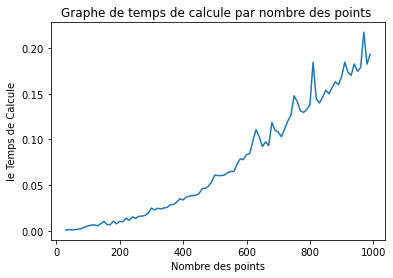

In [103]:
x = []
y = []
for i in range(30,1000,10):
    
    o = OTree(30,i)
    o.subdivide3d()
    start_time = time.time()

    rep_f = list_forces_rep(o.root)
    att_f = list_forces_att(o.root)
    forces = rep_f+att_f
    vitess = [0 for i in range(len (o.root.points)) ]
    new_pos,vitess = new_positions(forces,o.root,vitess,dt)

    end_time = time.time()
    duration = end_time - start_time
    x.append(i)
    y.append(duration)
    print(f"Duration pour calcule position de {i} points: {duration} ",)

plt.plot(x,y)
plt.xlabel('Nombre des points')
plt.ylabel('le Temps de Calcule')
plt.title('Graphe de temps de calcule par nombre des points ')
plt.savefig('Graphe_de_temps_de_calcule_par_nombre_des_points.pdf')
plt.show()


In [73]:
import sys
print(sys.getrecursionlimit())


3000


['c1']
['c2']
['c3']
['c4']
['c5']
['c6']
['h1', 'c2', 'c2', 'c6']
['h2', 'c1', 'c1', 'c3']
['h3', 'c2', 'c4', 'c4']
['h4', 'c3', 'c3', 'c5']
['h5', 'c4', 'c6', 'c6']
['h6', 'c5', 'c5', 'c1']
